## Understanding CV

Exploratory notebook to understand what Scikit-LearnKFold and StratifiedKFold really do.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

Import training dataset and get target data. Now sort the target so that all ones are at the end.

In [4]:
train = pd.read_csv("train.csv")
target = train.target.copy()
target.sort_values(inplace=True)

In [9]:
target.value_counts()/len(target)*100

0    96.355248
1     3.644752
Name: target, dtype: float64

In [17]:
sorted_target = target.reset_index(drop=True)

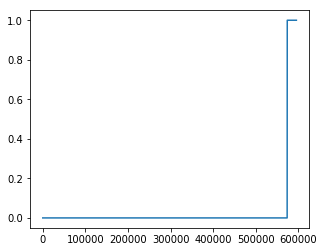

In [21]:
plt.figure(figsize=(5,4))
plt.plot(sorted_target);

### KFold 

KFold will split the data into k consecutive blocks. If k is small and the classes are so umbalanced as in this case we will end up having blocks of similar examples (even if we shuffle the set).

[     2      4      5 ... 595208 595209 595210] [     0      1      3 ... 595205 595207 595211]


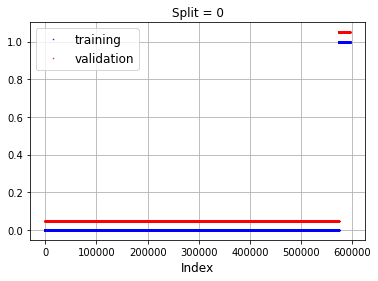

[     0      1      2 ... 595208 595210 595211] [     4     10     19 ... 595204 595206 595209]


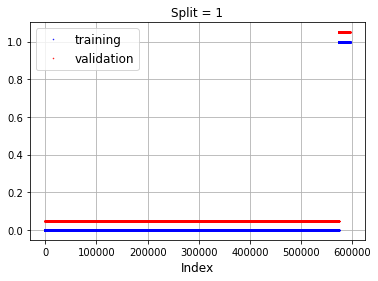

[     0      1      3 ... 595207 595209 595211] [     2      5      6 ... 595198 595208 595210]


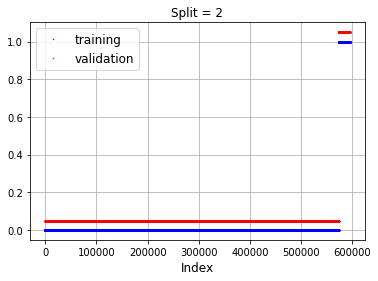

In [59]:
# Create folds
folds = KFold(n_splits=3, shuffle=True, random_state = 45)
#folds = KFold(n_splits=3, shuffle=False, random_state = 45)

offset = 0.05
    
# Go through folds
for i, (train_idx, valid_idx) in enumerate(folds.split(target, target)):
    
    print(train_idx, valid_idx)

    plt.figure(figsize=(6,4))   
    plt.title('Split = {}'.format(i))
    plt.plot(train_idx, target.iloc[train_idx].values, 'bo', label="training", markersize=0.5)
    plt.plot(valid_idx, target.iloc[valid_idx].values + offset, 'ro', label="validation", markersize=0.5)
    plt.legend(loc="upper left", fontsize=12)
    plt.xlabel("Index", fontsize=12)       
    plt.grid(True)
    plt.show()

### StratifiedKFold 

StratifiedKFold will split the data into k blocks but now the folds are made by preserving the percentage of samples for each class.

[191173 191174 191175 ... 595209 595210 595211] [     0      1      2 ... 580747 580748 580749]


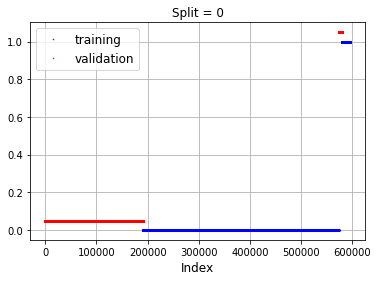

[     0      1      2 ... 595209 595210 595211] [191173 191174 191175 ... 587978 587979 587980]


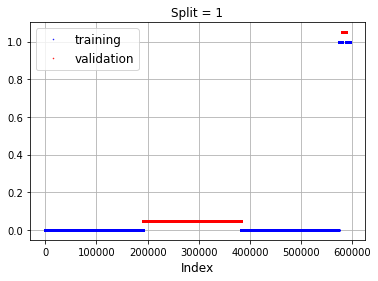

[     0      1      2 ... 587978 587979 587980] [382346 382347 382348 ... 595209 595210 595211]


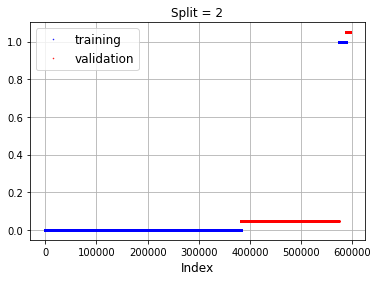

In [60]:
# Create folds
folds = StratifiedKFold(n_splits=3, shuffle=False, random_state = 45)

offset = 0.05
    
# Go through folds
for i, (train_idx, valid_idx) in enumerate(folds.split(target, target)):
    
    print(train_idx, valid_idx)

    plt.figure(figsize=(6,4))   
    plt.title('Split = {}'.format(i))
    plt.plot(train_idx, target.iloc[train_idx].values, 'bo', label="training", markersize=0.5)
    plt.plot(valid_idx, target.iloc[valid_idx].values + offset, 'ro', label="validation", markersize=0.5)
    plt.legend(loc="upper left", fontsize=12)
    plt.xlabel("Index", fontsize=12)       
    plt.grid(True)
    plt.show()